# Training and Validation losses

In [1]:
# Reloads modules automatically before executing code
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import os
from DL_vs_HateSpeech.plots.plot_loss import plot_losses_from_path
from DL_vs_HateSpeech.models.model_v0 import ModelV0
from DL_vs_HateSpeech.models import load_model_from_path
device = "cpu"


e:\ProgramFiles\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Model v0

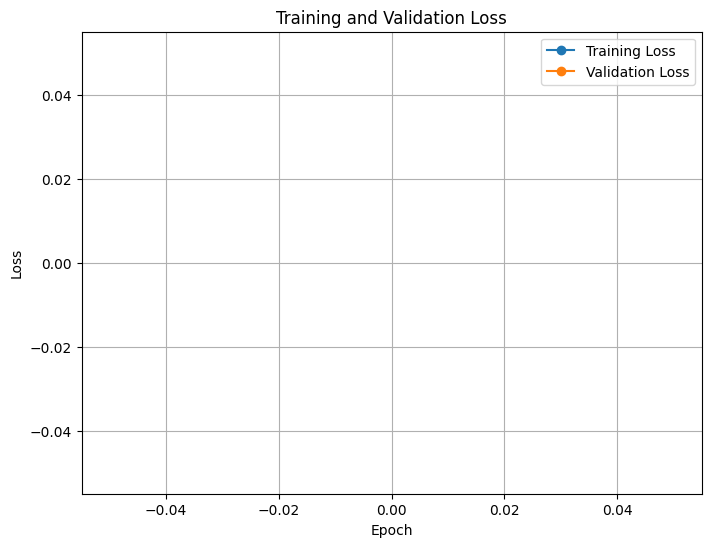

In [3]:
path = "./models/model_checkpoints/model_0"
# See the files in the path
plot_losses_from_path(path)

In [ ]:
model = load_model_from_path(path)